In [1]:
import pandas as pd
import numpy as np


# Для визуализаций и построения графиков 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Загружаю датасет

df = pd.read_csv('Test_Kodland.csv')
df.head(10)

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1
5,3121,15.0,10.01.2021,Unity,0
6,4230,12.0,28.03.2021,Unity,0
7,4848,15.0,21.02.2021,Веб-дизайн,1
8,4893,14.0,28.03.2021,Веб-дизайн,0
9,4957,14.0,21.03.2021,Веб-дизайн,0


In [3]:
# переименую столбцы 

#df.rename(columns={'Дата первого занятия': 'Date_first_lesson', 'Курс': 'Сourse'}, inplace=True)



col_name = ['id', 'age', 'date_first_lesson', 'course', 'm2']
df.set_axis(col_name, axis = 'columns', inplace = True)

In [4]:
df.head(5)

,id,age,date_first_lesson,course,m2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2172 non-null   int64  
 1   age                2022 non-null   float64
 2   date_first_lesson  2172 non-null   object 
 3   course             2172 non-null   object 
 4   m2                 2172 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 85.0+ KB


In [6]:
# проверка на пропуски
df.isna().sum()

id                     0
age                  150
date_first_lesson      0
course                 0
m2                     0
dtype: int64

In [7]:
# Смотрим, сколько пропусков в столбцах в %
(df.isna().mean() * 100).round(2)

id                   0.00
age                  6.91
date_first_lesson    0.00
course               0.00
m2                   0.00
dtype: float64

В столбце age 150 незаполненных строк, что составляет почти 7% от общего числа строк

In [8]:
# Смотрим количество учеников с разбивкой по возрастам 

df['age'].value_counts()

12.0    487
13.0    478
14.0    405
15.0    236
11.0    212
16.0    109
10.0     47
17.0     30
9.0       9
8.0       5
18.0      2
19.0      2
Name: age, dtype: int64

In [9]:
# медиана возраста

median_age = df['age'].median()
median_age

13.0

In [10]:
# Заменяю пустые значения в столбце age на значение медианы 

df['age'] = df['age'].fillna(median_age)

In [11]:
df.head(10)

,id,age,date_first_lesson,course,m2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1
5,3121,15.0,10.01.2021,Unity,0
6,4230,12.0,28.03.2021,Unity,0
7,4848,15.0,21.02.2021,Веб-дизайн,1
8,4893,14.0,28.03.2021,Веб-дизайн,0
9,4957,14.0,21.03.2021,Веб-дизайн,0


In [12]:
# необходимо age преобразовать из float в int

df = df.astype({"age": "int64"})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2172 non-null   int64 
 1   age                2172 non-null   int64 
 2   date_first_lesson  2172 non-null   object
 3   course             2172 non-null   object
 4   m2                 2172 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.0+ KB


In [14]:
# Разбираемся со столбцом date_first_lesson
# Изменяем формат object на datetime

import datetime   #подключаю библиотеку

df['date_first_lesson'] = pd.to_datetime(df['date_first_lesson'])

Так как интересует отток студентов при переходе с первого модуля обучения на второй, а обучение на одном модуле длится 4 недели, то не нужно учитывать записи со студентами, начавшими обучение 05.03.2021, тк они не успеют перейти на второй модуль обучения.    

In [15]:
date = pd.to_datetime('2021-03-04')
date

Timestamp('2021-03-04 00:00:00')

In [16]:
df_f = df.loc[df['date_first_lesson'] > date]
df_f.head()

,id,age,date_first_lesson,course,m2
4,3014,15,2021-03-14,Веб-дизайн,1
5,3121,15,2021-10-01,Unity,0
6,4230,12,2021-03-28,Unity,0
8,4893,14,2021-03-28,Веб-дизайн,0
9,4957,14,2021-03-21,Веб-дизайн,0


In [17]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 4 to 2171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1196 non-null   int64         
 1   age                1196 non-null   int64         
 2   date_first_lesson  1196 non-null   datetime64[ns]
 3   course             1196 non-null   object        
 4   m2                 1196 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 56.1+ KB


Строим столбчатую диаграмму 

<AxesSubplot:xlabel='course', ylabel='id'>

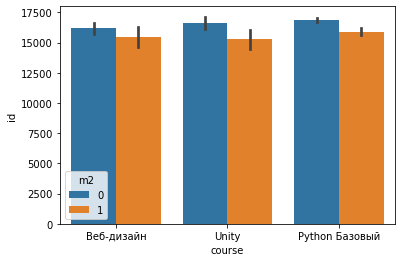

In [18]:
sns.barplot(data=df_f, x="course", y = 'id',  hue = 'm2')

In [19]:
df_desight = df_f[df_f['course'] == 'Веб-дизайн'] 

In [20]:
df_desight.head()

,id,age,date_first_lesson,course,m2
4,3014,15,2021-03-14,Веб-дизайн,1
8,4893,14,2021-03-28,Веб-дизайн,0
9,4957,14,2021-03-21,Веб-дизайн,0
11,5910,11,2021-03-14,Веб-дизайн,1
12,6528,12,2021-03-28,Веб-дизайн,0


In [21]:
df_desight.count()

id                   245
age                  245
date_first_lesson    245
course               245
m2                   245
dtype: int64

In [23]:
len(df_desight)

245

In [34]:
len(df_desight[df_desight['m2'] == 0])

190

In [40]:
# отток 

print ('Доля оттока на курсе "Веб-дизайн" составила:',
        round ((len(df_desight[df_desight['m2'] == 0]) / len(df_desight) )*100), '%') 

Доля оттока на курсе "Веб-дизайн" составила: 78 %


In [45]:
import plotly.graph_objects as go

In [53]:
f = go.FigureWidget()

In [55]:
f.add_scatter(y=[2, 1, 4, 3]);
f.add_bar(y=[1, 4, 3, 2]);
f.show()